## Inferential Statistics

In [4]:
import numpy as np
from scipy import stats

In [7]:
#sample score of 30 orders 
sample_data = [
    78.2, 74.1, 76.3, 79.0, 77.4, 80.5, 74.8, 76.9, 78.6, 75.5,
    81.2, 77.9, 76.0, 79.4, 78.1, 74.7, 76.8, 77.6, 80.0, 75.9,
    76.2, 79.3, 78.0, 77.3, 74.9, 76.4, 79.1, 78.5, 77.2, 76.7
]

In [8]:
population_mean = 75

In [9]:
# One-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

print("Sample Mean:", np.mean(sample_data))
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Decision Rule
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Sample Mean: 77.41666666666667
T-statistic: 7.427499539371109
P-value: 3.4817058268390613e-08
Reject the null hypothesis: Sample mean is significantly different.


As P-Value is greater then 0.05 therefore we will consider it as null hypothesis

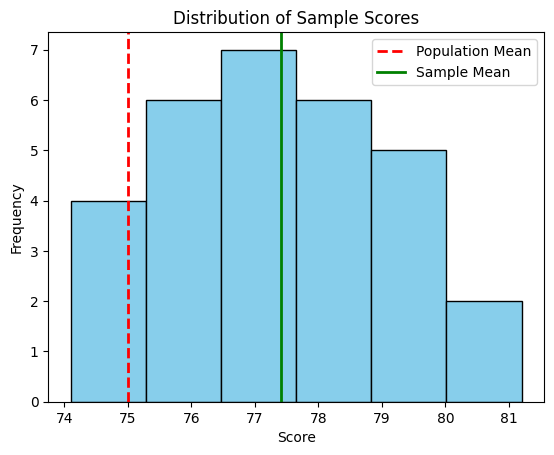

In [10]:
# Optional: Visualize the distribution
import matplotlib.pyplot as plt

plt.hist(sample_data, bins=6, color='skyblue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(np.mean(sample_data), color='green', linestyle='solid', linewidth=2, label='Sample Mean')
plt.title('Distribution of Sample Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## data cleaning scaling and encoding 

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('smoking.csv')
# Display the first few rows of the dataset
df.head()


,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [13]:
df.isnull().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [14]:
df.shape

(1691, 13)

## changing columns to its appropiate datatypes

In [17]:
df['gender'] = df['gender'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['gender'] = df['gender'].astype('category')
df['amt_weekends'] = df['amt_weekends'].astype('Int64')
df['amt_weekdays'] = df['amt_weekdays'].astype('Int64')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 1691 non-null   category
 1   age                    1691 non-null   int64   
 2   marital_status         1691 non-null   category
 3   highest_qualification  1691 non-null   object  
 4   nationality            1691 non-null   object  
 5   ethnicity              1691 non-null   object  
 6   gross_income           1691 non-null   object  
 7   region                 1691 non-null   object  
 8   smoke                  1691 non-null   object  
 9   amt_weekends           421 non-null    Int64   
 10  amt_weekdays           421 non-null    Int64   
 11  type                   421 non-null    object  
dtypes: Int64(2), category(2), int64(1), object(7)
memory usage: 139.2+ KB


In [ ]:
df.amt_weekdays.unique()


<IntegerArray>
[<NA>,   12,    6,    8,   15,    5,   20,   25,   40,    4,   30,   10,    7,
    9,    2,   50,   16,   35,   18,    1,    0,    3,   60,   24,   45]
Length: 25, dtype: Int64

In [20]:
df.amt_weekdays.value_counts()

amt_weekdays
20    82
10    80
15    56
5     28
12    17
30    17
25    16
8     16
0     16
7     14
6     14
2     13
4     10
40    10
3      9
1      8
18     5
35     3
50     2
9      1
55     1
16     1
24     1
45     1
Name: count, dtype: Int64

In [23]:
df.amt_weekends.unique()

<IntegerArray>
[<NA>,   12,    6,    8,   15,    5,   20,   25,   40,    4,   30,   10,    7,
    9,    2,   50,   16,   35,   18,    1,    0,    3,   60,   24,   45]
Length: 25, dtype: Int64

In [24]:
df.amt_weekends.value_counts()

amt_weekends
20    111
10     69
15     58
5      32
30     27
25     24
40     15
12     13
6      10
7       8
8       7
2       7
1       6
3       6
0       6
35      5
18      4
4       4
50      2
16      2
60      2
9       1
24      1
45      1
Name: count, dtype: Int64

In [25]:
df.type.unique()

array([nan, 'Packets', 'Hand-Rolled', 'Both/Mainly Packets',
       'Both/Mainly Hand-Rolled'], dtype=object)

In [26]:
df.type.value_counts()

type
Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: count, dtype: int64

In [32]:
df['type'] = df['type'].fillna('Packets')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 1691 non-null   category
 1   age                    1691 non-null   int64   
 2   marital_status         1691 non-null   category
 3   highest_qualification  1691 non-null   object  
 4   nationality            1691 non-null   object  
 5   ethnicity              1691 non-null   object  
 6   gross_income           1691 non-null   object  
 7   region                 1691 non-null   object  
 8   smoke                  1691 non-null   object  
 9   type                   422 non-null    object  
dtypes: category(2), int64(1), object(7)
memory usage: 109.4+ KB


In [33]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,Packets
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,Packets
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,Packets
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,Packets


In [35]:
df['highest_qualification'] = df['highest_qualification'].astype('category')
df['nationality'] = df['nationality'].astype('category')
df['ethnicity'] = df['ethnicity'].astype('category')
df['gross_income'] = df['gross_income'].astype('category')
df['region'] = df['region'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['type'] = df['type'].astype('category')

In [13]:
# 2. One-hot encode categorical columns
categorical_cols = ['gender', 'marital_status', 'highest_qualification' , 'nationality' , 'ethnicity' , 'gross_income' , 'region' , 'smoke' , 'type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("After Encoding:")
df_encoded.head()

After Encoding:


,Unnamed: 0,age,amt_weekends,amt_weekdays,gender_Male,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_Degree,...,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales,smoke_Yes,type_Both/Mainly Packets,type_Hand-Rolled,type_Packets
0,1,38,NaN,NaN,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,42,12.0,12.0,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
2,3,40,NaN,NaN,True,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,4,40,NaN,NaN,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,5,39,NaN,NaN,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [15]:
numerical_features = ['age']

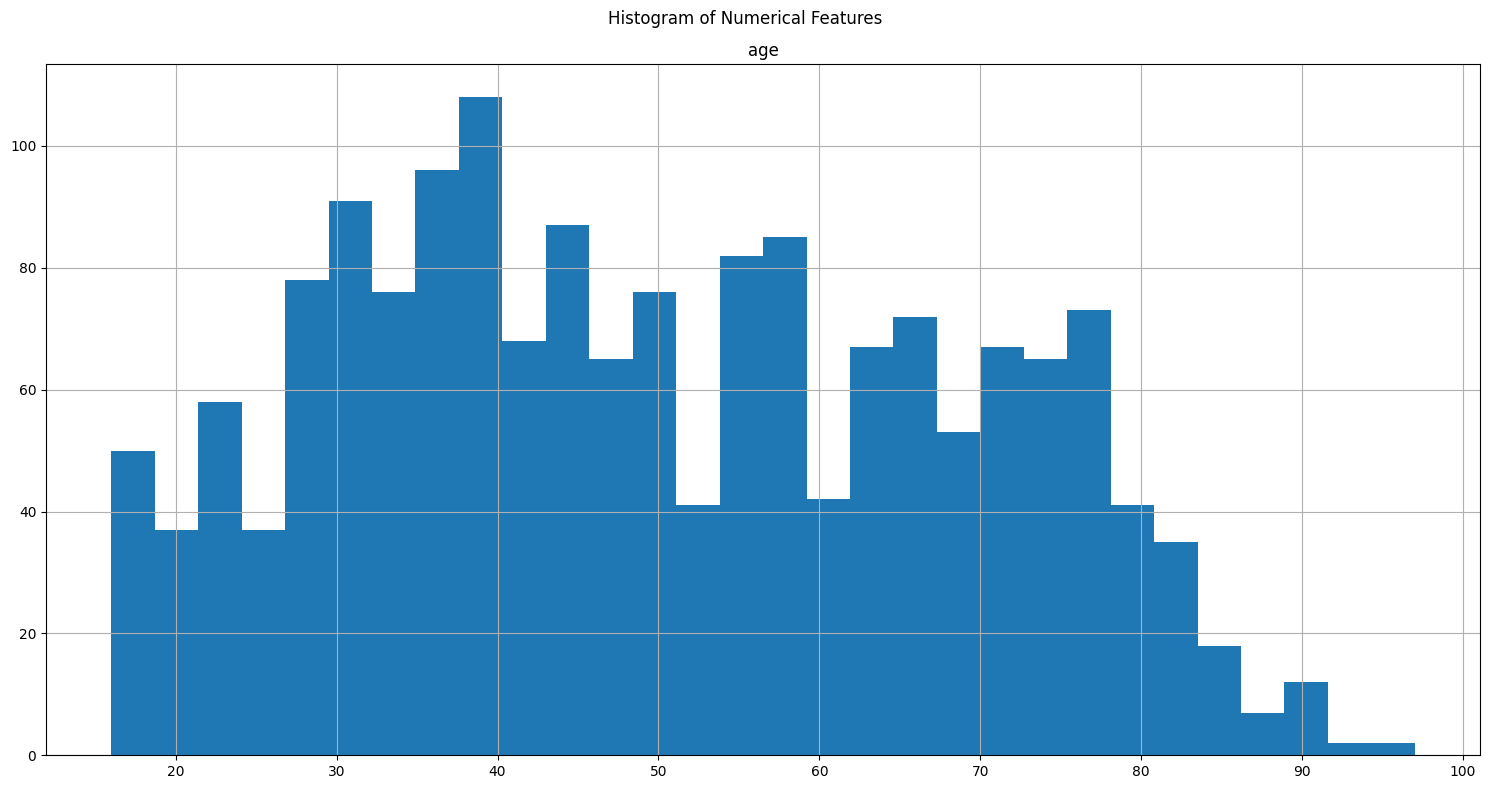

In [48]:
# Histogram (Check for normal distribution)
df_encoded[numerical_features].hist(bins=30, figsize=(15, 8))
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

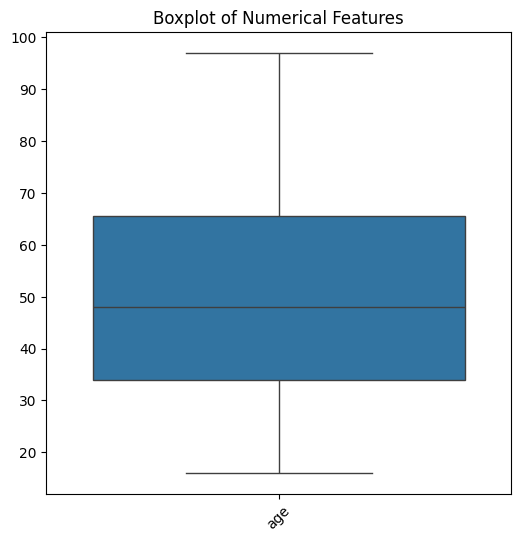

In [49]:
#  Step 3: Box Plot (Check for outliers and spread)
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.boxplot(data=df_encoded[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,Unnamed: 0,age,amt_weekends,amt_weekdays,gender_Male,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_Degree,...,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales,smoke_Yes,type_Both/Mainly Packets,type_Hand-Rolled,type_Packets
0,1,0.271605,NaN,NaN,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,0.320988,12.0,12.0,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
2,3,0.296296,NaN,NaN,True,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,4,0.296296,NaN,NaN,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,5,0.283951,NaN,NaN,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [17]:
for col in df_encoded.select_dtypes(include='boolean').columns:
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

,Unnamed: 0,age,amt_weekends,amt_weekdays,gender_Male,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_Degree,...,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales,smoke_Yes,type_Both/Mainly Packets,type_Hand-Rolled,type_Packets
0,1,0.271605,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0.320988,12.0,12.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
2,3,0.296296,NaN,NaN,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,0.296296,NaN,NaN,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,0.283951,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
